# Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('bank-additional-full.csv', delimiter=';')
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_raw.shape

(41188, 21)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- No missing values

In [5]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# EDA

In [6]:
df = df_raw
df = df.reset_index()

In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):

    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Not Subscribe", "Subscribe"], loc=legend_)
    # Labels
    plt.ylabel("Clients base (%)")
    plt.show()
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):

    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### Subscribe

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

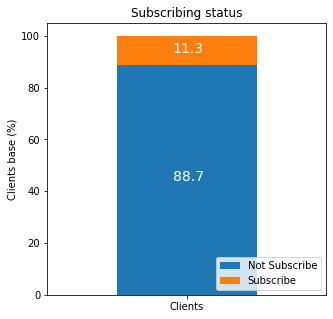

In [11]:
sub = df[['index', 'y']]
sub.columns = ['Clients', 'Subscribe']
sub_total = sub.groupby(sub['Subscribe']).count()
sub_percentage = sub_total / sub_total.sum() * 100
plot_stacked_bars(sub_percentage.transpose(), "Subscribing status", (5, 5), legend_="lower right")

Around 11% clients subscribe, make sense

### Client

#### age

<AxesSubplot:ylabel='Frequency'>

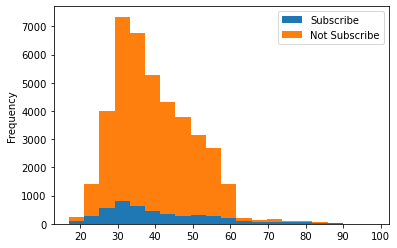

In [12]:
age = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['age'],
    "Not Subscribe":df[df["y"]== 'no']['age']})

age[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=20,stacked=True)

In [13]:
#convert to age range 
bins = [0, 18, 40, 60, 100]
labels = ['Youth', 'Young Adults', 'Mid-age Adults', 'Older']

df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

df.drop(columns = 'age')

,index,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agerange
0,0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Mid-age Adults
1,1,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Mid-age Adults
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Young Adults
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Young Adults
4,4,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Mid-age Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Older
41184,41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Mid-age Adults
41185,41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Mid-age Adults
41186,41186,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Mid-age Adults


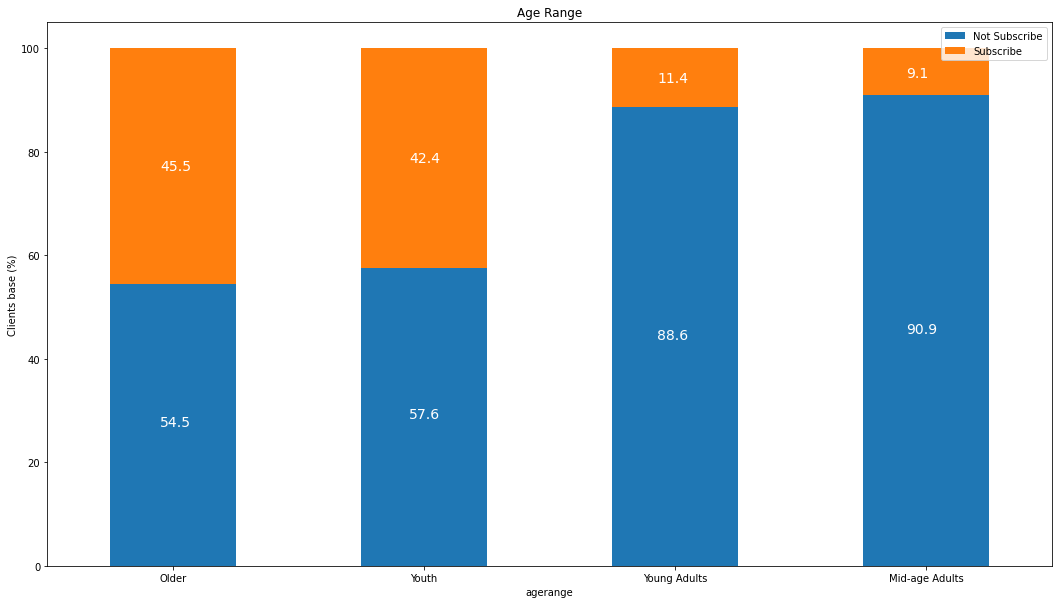

In [14]:
agerange = df.groupby([df['y'], df['agerange']])['index'].count().unstack(level=0)
agerange_pt = (agerange.div(agerange.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(agerange_pt, 'Age Range')

older people and youth are more likely to subscribe

#### Job

In [16]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

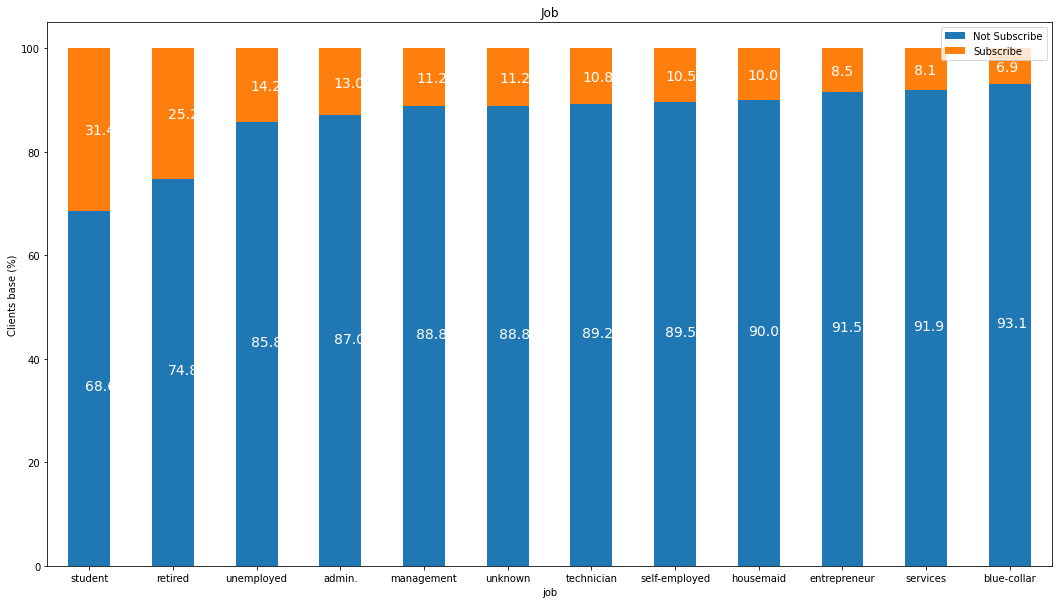

In [15]:
job = df.groupby([df['y'], df['job']])['index'].count().unstack(level=0)
job_pt = (job.div(job.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(job_pt, 'Job')

similar to age, students and retired are more likely to subscribe

#### Marital

In [18]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

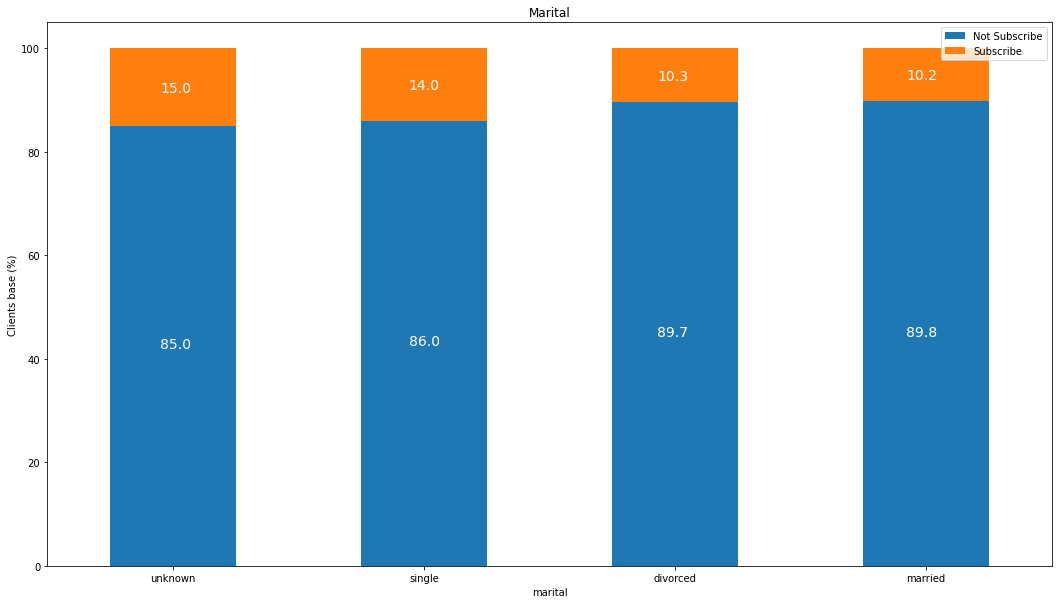

In [17]:
marital = df.groupby([df['y'], df['marital']])['index'].count().unstack(level=0)
marital_pt = (marital.div(marital.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(marital_pt, 'Marital')

similar rate

noticed that unknown is more likely to subscribe

#### Education

In [19]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [20]:
#rename and combine some columns
df.loc[df['education'] == 'basic.4y', 'education'] = 'Basic'
df.loc[df['education'] == 'basic.6y', 'education'] = 'Basic'
df.loc[df['education'] == 'basic.9y', 'education'] = 'Basic'

In [22]:
df['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

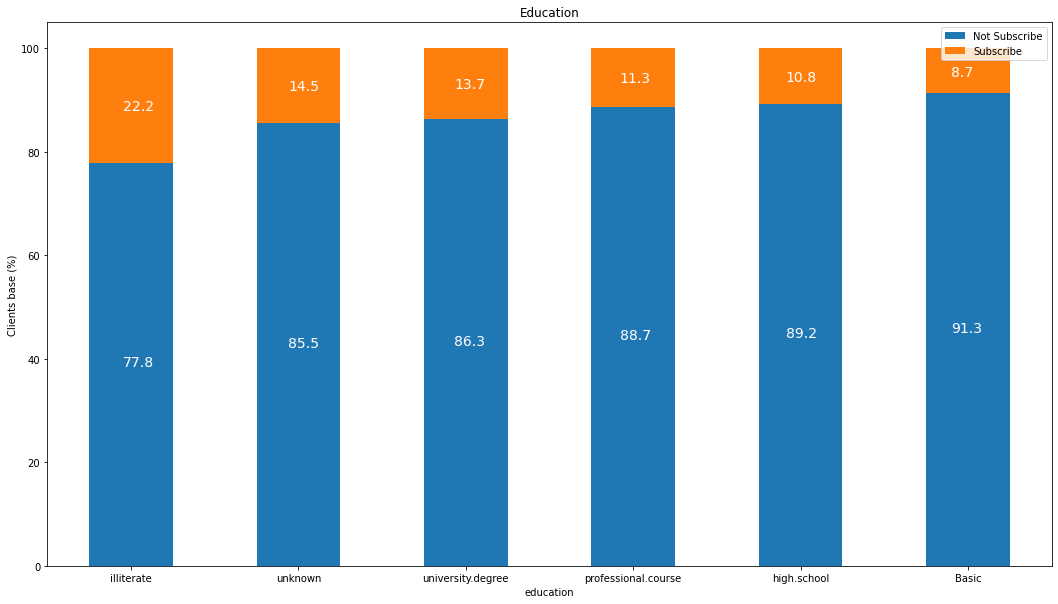

In [23]:
edu = df.groupby([df['y'], df['education']])['index'].count().unstack(level=0)
edu_pt = (edu.div(edu.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(edu_pt, 'Education')

illiterates are more likely to purchase, probably they earn more money?

note that unknowns are also likely to subscribe

#### Default

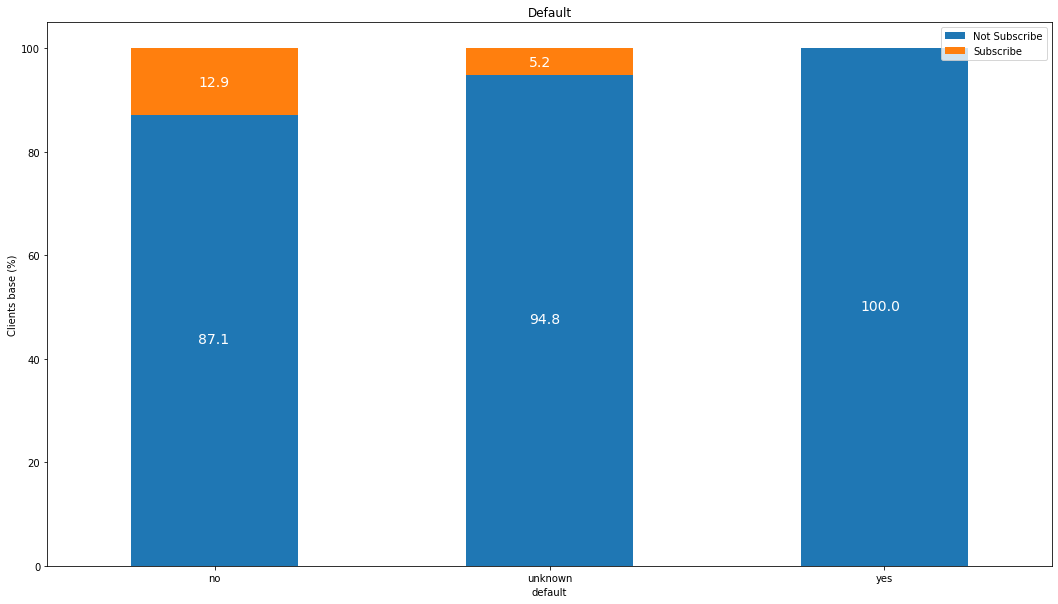

In [24]:
default = df.groupby([df['y'], df['default']])['index'].count().unstack(level=0)
default_pt = (default.div(default.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(default_pt, 'Default')

clients who has confirmed credit has NO subscribe at all

No credits are more likely to subscribe

In [25]:
df[df['default'] == 'yes']

,index,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agerange
21580,21580,48,technician,married,professional.course,yes,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,Mid-age Adults
21581,21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,Mid-age Adults
24866,24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,...,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,Young Adults


In [26]:
#treated as outliers
df = df.drop([21580, 21581, 24866])

#### Loan

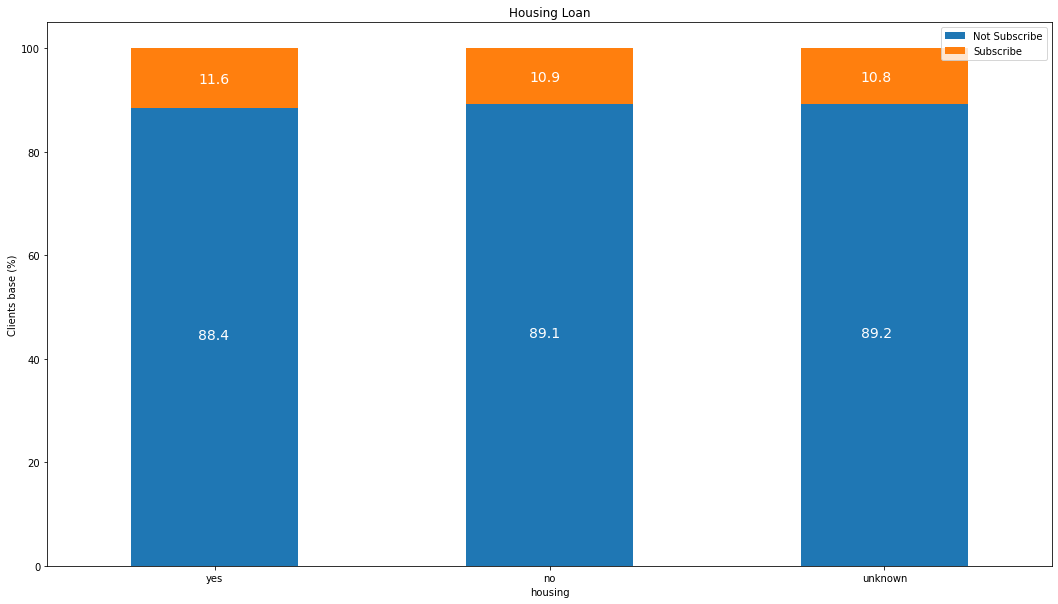

In [27]:
#housing loan
housing = df.groupby([df['y'], df['housing']])['index'].count().unstack(level=0)
housing_pt = (housing.div(housing.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(housing_pt, 'Housing Loan')

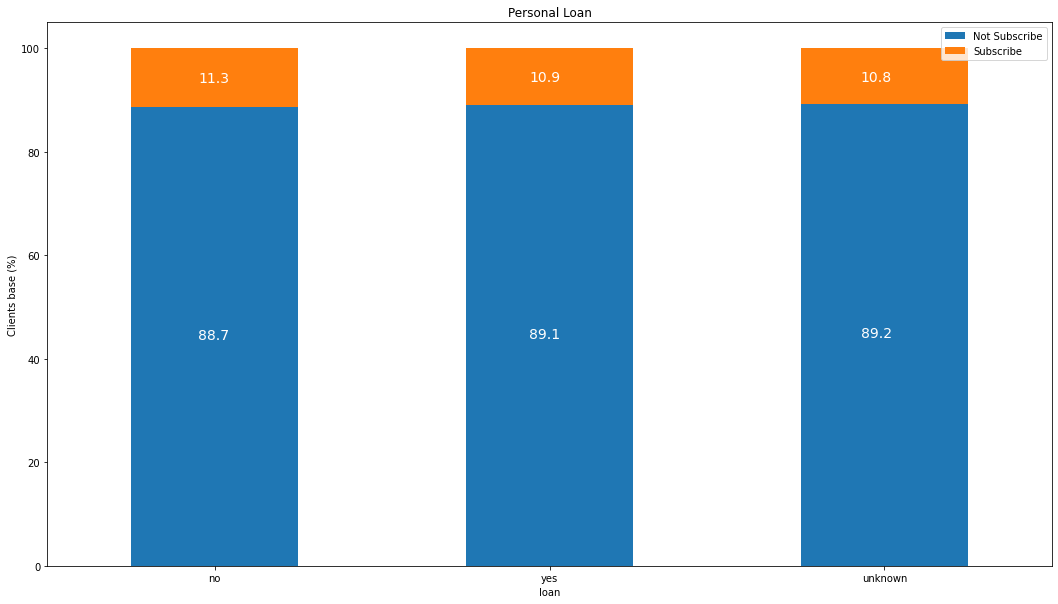

In [28]:
#personal loan
personal = df.groupby([df['y'], df['loan']])['index'].count().unstack(level=0)
personal_pt = (personal.div(personal.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(personal_pt, 'Personal Loan')

not too much difference, combine in one

In [41]:
df['total_loan'] = 'unknown'

df.loc[(df['housing'] == 'no') & (df['loan'] == 'no'), 'total_loan'] = 'no'
df.loc[(df['housing'] == 'yes') & (df['loan'] == 'yes'), 'total_loan'] = 'both'
df.loc[(df['housing'] == 'yes') & (df['loan'] != 'yes'), 'total_loan'] = 'housing'
df.loc[(df['housing'] != 'yes') & (df['loan'] == 'yes'), 'total_loan'] = 'personal'

In [42]:
df['total_loan'].value_counts()

housing     17884
no          16063
both         3691
personal     2557
unknown       990
Name: total_loan, dtype: int64

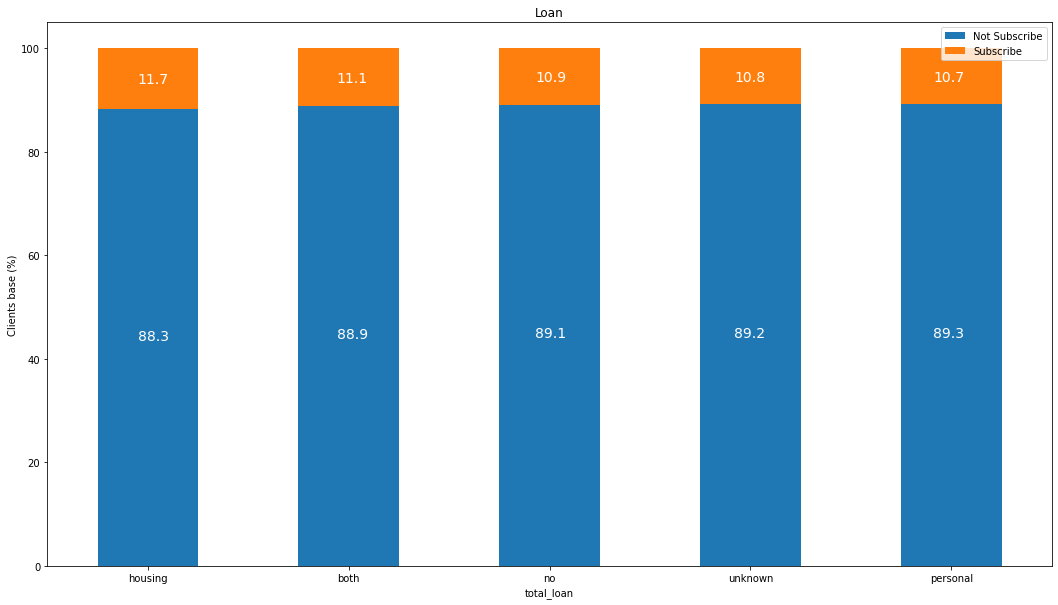

In [43]:
loan = df.groupby([df['y'], df['total_loan']])['index'].count().unstack(level=0)
loan_pt = (loan.div(loan.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(loan_pt, 'Loan')

still, similar

### related with the last contact of the current campaign

In [44]:
df[['contact', 'month', 'day_of_week', 'duration']].head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


#### Contact

In [45]:
df['contact'].value_counts()

cellular     26141
telephone    15044
Name: contact, dtype: int64

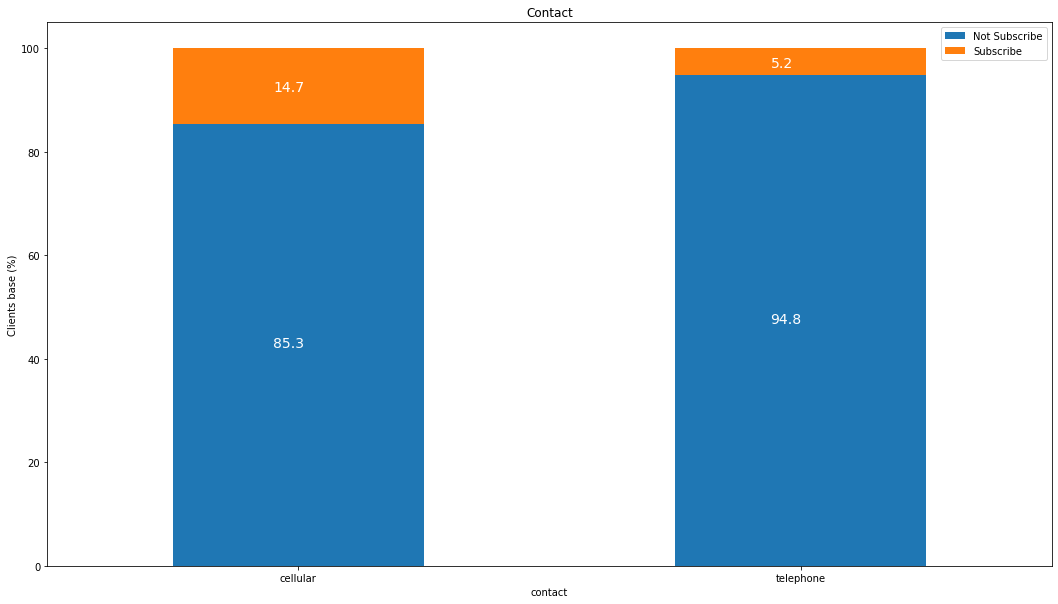

In [46]:
contact = df.groupby([df['y'], df['contact']])['index'].count().unstack(level=0)
contact_pt = (contact.div(contact.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(contact_pt, 'Contact')

clients who contacted with cellular are more likely to subscribe

probably because when calling telephone, people are not around

In [47]:
df['duration'].describe()

count    41185.000000
mean       258.296297
std        259.285210
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<AxesSubplot:ylabel='Frequency'>

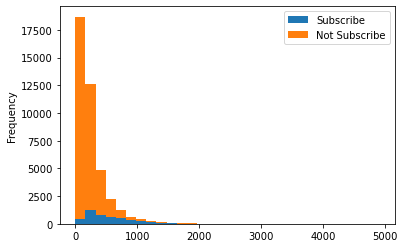

In [48]:
duration = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['duration'],
    "Not Subscribe":df[df["y"]== 'no']['duration']})

duration[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. should be removed

In [49]:
df = df.drop(columns = 'duration')

#### Date

In [50]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

not including jan and feb

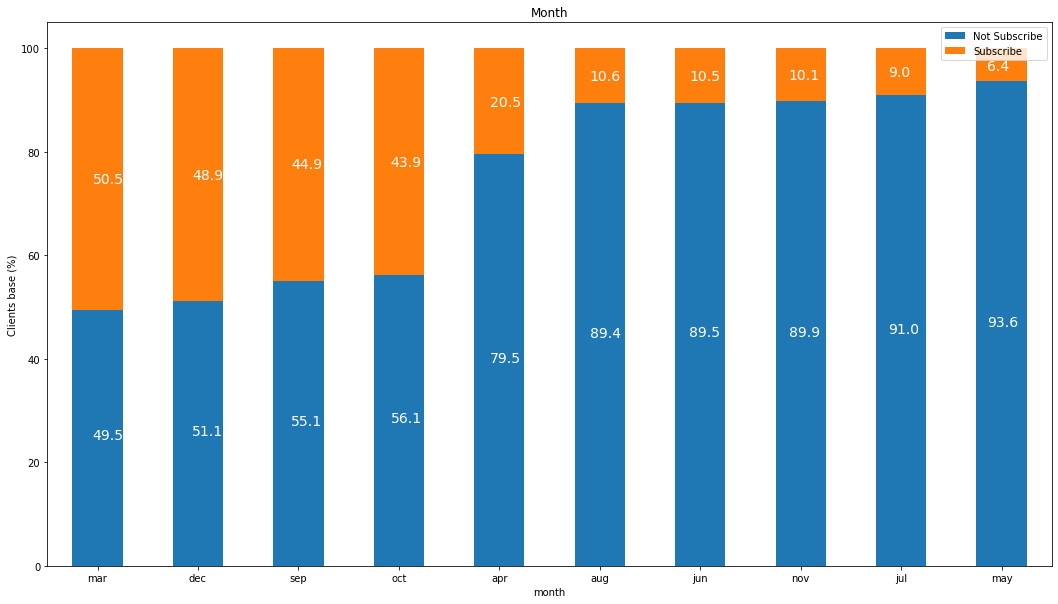

In [51]:
month = df.groupby([df['y'], df['month']])['index'].count().unstack(level=0)
month_pt = (month.div(month.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(month_pt, 'Month')

It looks like there are more subscribers at the beginning (March) and towards the end (Dec., Sep, Oct.) of the year

Not for sure because lacking Jan and Feb.

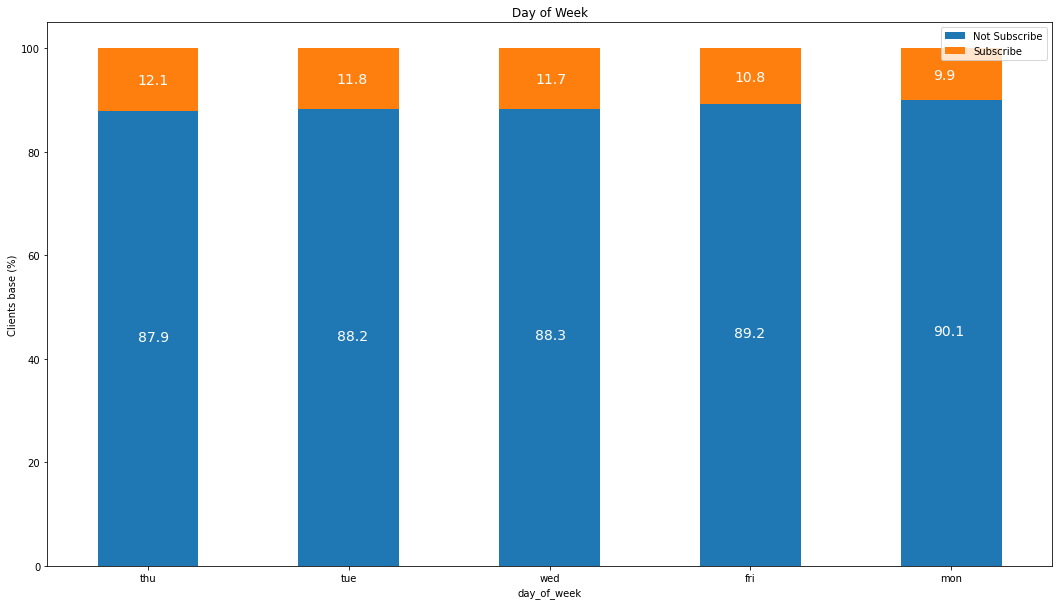

In [52]:
day = df.groupby([df['y'], df['day_of_week']])['index'].count().unstack(level=0)
day_pt = (day.div(day.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(day_pt, 'Day of Week')

Not too much difference

### other attributes

In [53]:
df[['campaign', 'pdays', 'previous', 'poutcome']].describe()

,campaign,pdays,previous
count,41185.000000,41185.000000,41185.000000
mean,2.567682,962.472793,0.172951
std,2.770091,186.917455,0.494901
min,1.000000,0.000000,0.000000
25%,1.000000,999.000000,0.000000
50%,2.000000,999.000000,0.000000
75%,3.000000,999.000000,0.000000
max,56.000000,999.000000,7.000000


#### Campaign

<AxesSubplot:ylabel='Frequency'>

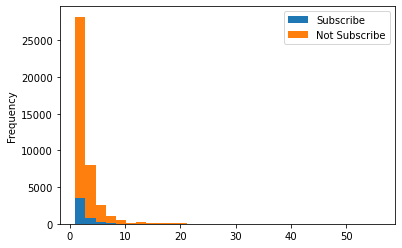

In [54]:
campaign = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['campaign'],
    "Not Subscribe":df[df["y"]== 'no']['campaign']})

campaign[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

In [55]:
df[df['campaign'] > 10]['y'].value_counts()

no     842
yes     27
Name: y, dtype: int64

lower than subscribe ratio -> more campaign contacted, less subscribe

#### pdays

<AxesSubplot:ylabel='Frequency'>

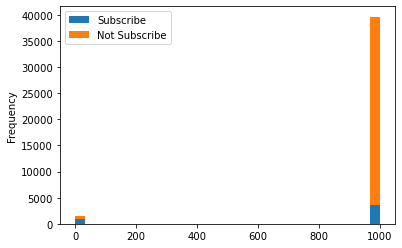

In [56]:
days = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['pdays'],
    "Not Subscribe":df[df["y"]== 'no']['pdays']})

days[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

<AxesSubplot:ylabel='Frequency'>

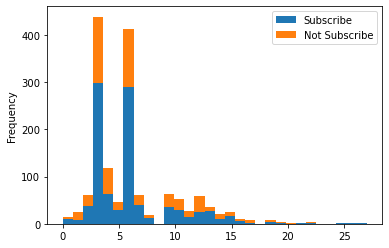

In [57]:
#check contacted
pdays = pd.DataFrame({"Subscribe": df[(df["y"]== 'yes') & (df['pdays'] < 999)]['pdays'],
    "Not Subscribe":df[(df["y"]== 'no') & (df['pdays'] < 999)]['pdays']})

pdays[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

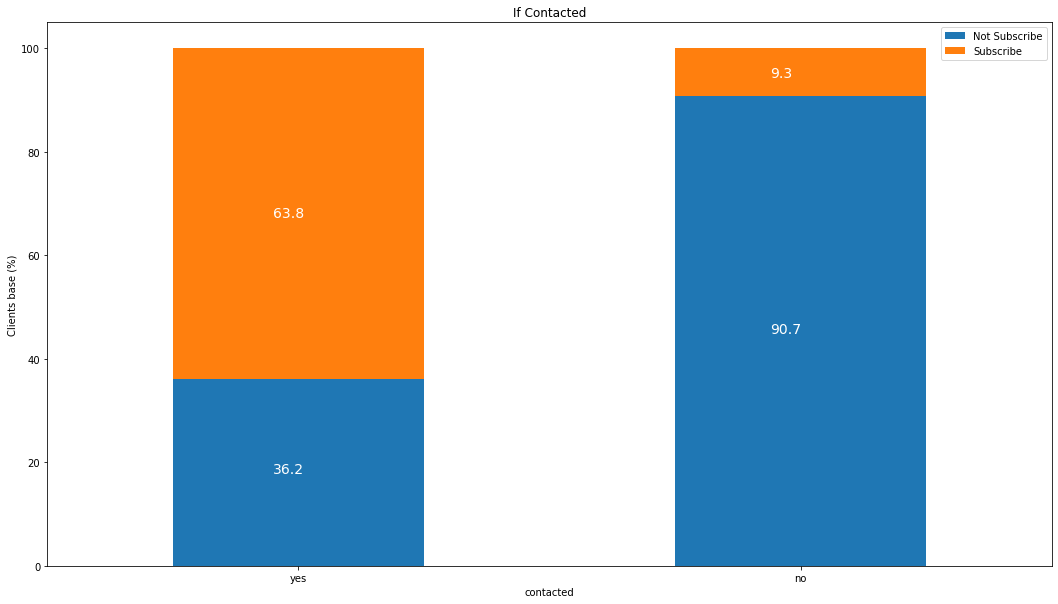

In [60]:
#convert to contacted and no contacted
df['contacted'] = 'yes'

df.loc[df['pdays'] == 999,'contacted'] = 'no'

pday = df.groupby([df['y'], df['contacted']])['index'].count().unstack(level=0)
pday_pt = (pday.div(pday.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(pday_pt, 'If Contacted')

In [62]:
df = df.drop(columns = 'pdays')

#### Previous

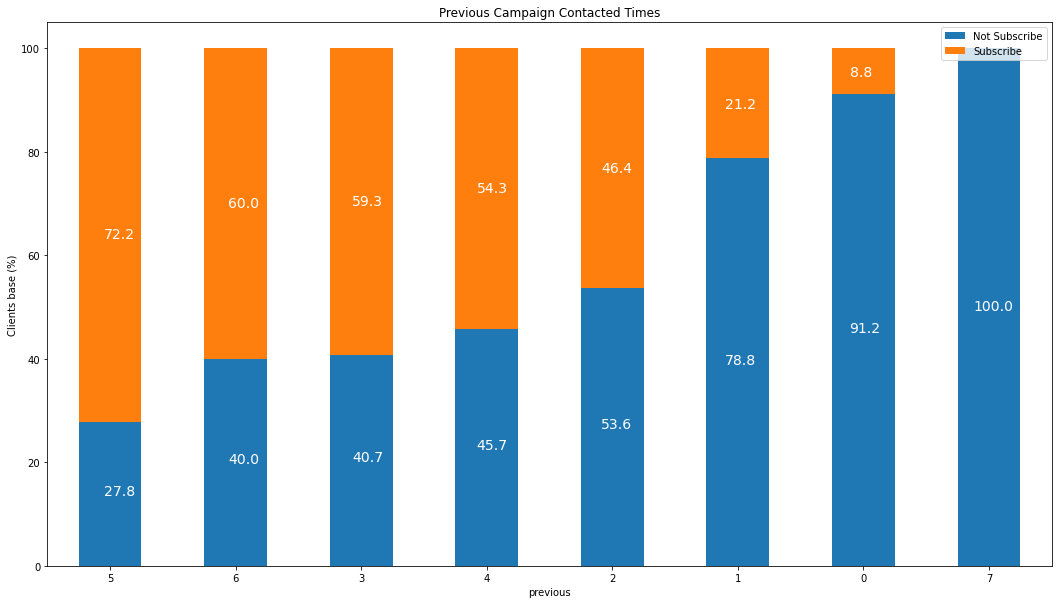

In [63]:
previous2 = df.groupby([df['y'], df['previous']])['index'].count().unstack(level=0)
previous2_pt = (previous2.div(previous2.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(previous2_pt, 'Previous Campaign Contacted Times')

In [64]:
#check previous = 7
df[df['previous'] == 7]

,index,age,job,marital,education,default,housing,loan,contact,month,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agerange,total_loan,contacted
41081,41081,51,admin.,divorced,high.school,no,yes,no,cellular,nov,...,success,-1.1,94.767,-50.8,1.049,4963.6,no,Mid-age Adults,housing,yes


In [65]:
#only one person, seems as outliers (extreme value) ->remove
df = df.drop(41081)
df[df['previous'] == 7]

,index,age,job,marital,education,default,housing,loan,contact,month,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agerange,total_loan,contacted


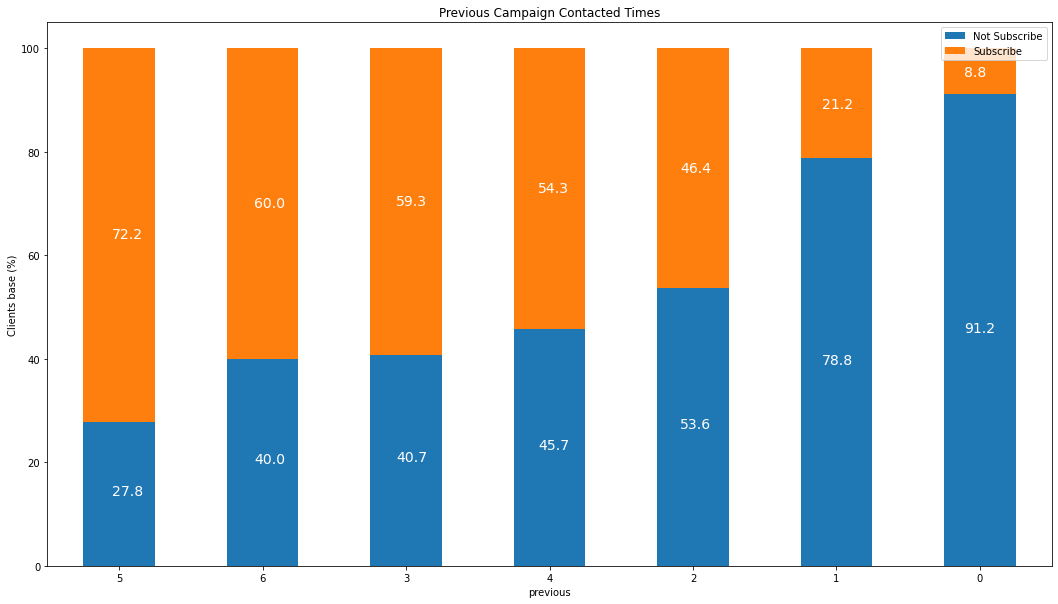

In [66]:
previous = df.groupby([df['y'], df['previous']])['index'].count().unstack(level=0)
previous_pt = (previous.div(previous.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(previous_pt, 'Previous Campaign Contacted Times')

more contacted -> relatively more subscribe

#### poutcome

In [68]:
df['poutcome'].value_counts()

nonexistent    35561
failure         4251
success         1372
Name: poutcome, dtype: int64

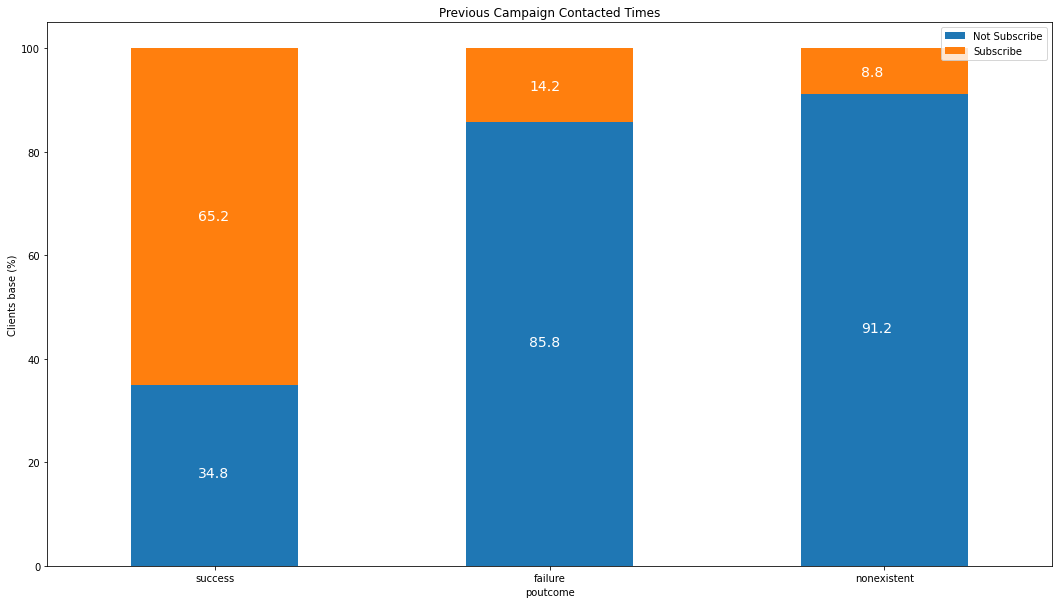

In [69]:
outcome = df.groupby([df['y'], df['poutcome']])['index'].count().unstack(level=0)
outcome_pt = (outcome.div(outcome.sum(axis=1), axis=0) * 100).sort_values(by=['yes'], ascending=False)
plot_stacked_bars(outcome_pt, 'Previous Campaign Contacted Times')

Clients who attended last campaign are more likely to subscribe 

### social and economic context attributes

In [70]:
df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000
mean,0.081855,93.575651,-40.502528,3.621275,5167.037187
std,1.570998,0.578835,4.628037,1.734458,72.246690
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:ylabel='Frequency'>

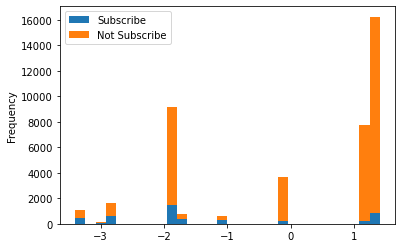

In [71]:
emp = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['emp.var.rate'],
    "Not Subscribe":df[df["y"]== 'no']['emp.var.rate']})

emp[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

<AxesSubplot:ylabel='Frequency'>

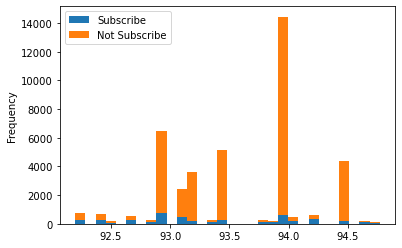

In [72]:
price = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['cons.price.idx'],
    "Not Subscribe":df[df["y"]== 'no']['cons.price.idx']})

price[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

<AxesSubplot:ylabel='Frequency'>

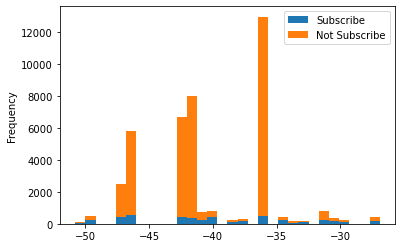

In [73]:
conf = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['cons.conf.idx'],
    "Not Subscribe":df[df["y"]== 'no']['cons.conf.idx']})

conf[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

<AxesSubplot:ylabel='Frequency'>

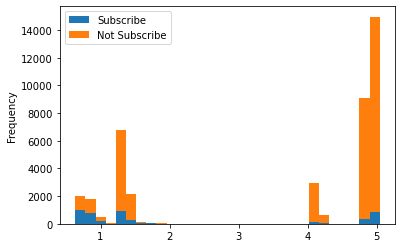

In [74]:
euribor3m = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['euribor3m'],
    "Not Subscribe":df[df["y"]== 'no']['euribor3m']})

euribor3m[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

<AxesSubplot:ylabel='Frequency'>

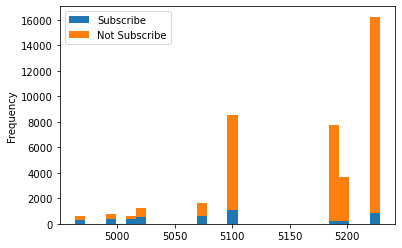

In [75]:
employed = pd.DataFrame({"Subscribe": df[df["y"]== 'yes']['nr.employed'],
    "Not Subscribe":df[df["y"]== 'no']['nr.employed']})

employed[["Subscribe","Not Subscribe"]].plot(kind='hist', bins=30,stacked=True)

why number of employee was float???

looks like less nr.employed yields more subscribe

### Conclusion

1. Youth and Elder (students and retired) are more likely to subscribe 
2. unknown, single > married, divioced
3. higher education level yield higher rate of subscription
4. No credits defalut > yes (but only 3 people)
5. loan, regardless personal or housing, has no much influence on the subscribe
6. clients who contacted with cellular are more likely to subscribe, probably because when calling telephone, people are not around
7. There are more subscribers at the beginning (March) and towards the end (Dec., Sep, Oct.) of the year, but no much difference based on each day of week
8. lower than subscribe ratio -> more contacted in this campaign, less subscribe
9. Client who was last contacted subscribe more, the more contacts performed before this campaign, the more chance the clients will subscribe and clients who attended last campaign are more likely to subscribe

In [78]:
df.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agerange,total_loan,contacted
0,0,56,housemaid,married,Basic,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Mid-age Adults,no,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Mid-age Adults,no,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Young Adults,housing,no
3,3,40,admin.,married,Basic,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Young Adults,no,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Mid-age Adults,personal,no


In [79]:
df.shape

(41184, 23)

In [83]:
df2 = pd.read_csv('bank-full.csv', delimiter=';')

In [84]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
